<a href="https://colab.research.google.com/github/matheusBernal/Brain-Tumor-Transfer-Learning/blob/main/Brain_Tumor_Transfer_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install kaggle

In [ ]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import RMSprop
import matplotlib.pyplot as plt
import numpy as np
from keras.preprocessing import image
import os
import shutil


In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"matheusborges","key":"a09eac5babdace845ebfd728d90b58a1"}'}

In [ ]:
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d ahmedsorour1/mri-for-brain-tumor-with-bounding-boxes
!unzip mri-for-brain-tumor-with-bounding-boxes.zip -d mri-for-brain-tumor-with-bounding-boxes

A saída de streaming foi truncada nas últimas 5000 linhas.
  inflating: mri-for-brain-tumor-with-bounding-boxes/Train/No Tumor/images/Tr-no_1015.jpg  
  inflating: mri-for-brain-tumor-with-bounding-boxes/Train/No Tumor/images/Tr-no_1016.jpg  
  inflating: mri-for-brain-tumor-with-bounding-boxes/Train/No Tumor/images/Tr-no_1019.jpg  
  inflating: mri-for-brain-tumor-with-bounding-boxes/Train/No Tumor/images/Tr-no_1020.jpg  
  inflating: mri-for-brain-tumor-with-bounding-boxes/Train/No Tumor/images/Tr-no_1022.jpg  
  inflating: mri-for-brain-tumor-with-bounding-boxes/Train/No Tumor/images/Tr-no_1025.jpg  
  inflating: mri-for-brain-tumor-with-bounding-boxes/Train/No Tumor/images/Tr-no_1031.jpg  
  inflating: mri-for-brain-tumor-with-bounding-boxes/Train/No Tumor/images/Tr-no_1032.jpg  
  inflating: mri-for-brain-tumor-with-bounding-boxes/Train/No Tumor/images/Tr-no_1040.jpg  
  inflating: mri-for-brain-tumor-with-bounding-boxes/Train/No Tumor/images/Tr-no_1041.jpg  
  inflating: mri-for-

In [ ]:
categories = ['Glioma', 'Meningioma', 'Pituitary', 'No tumor']
def update_folder(categories,train=True):
  for category in categories:
    if train:
      category_folder = f'/content/mri-for-brain-tumor-with-bounding-boxes/Train/{category}'
    else:
      category_folder = f'/content/mri-for-brain-tumor-with-bounding-boxes/Val/{category}'
    images_folder = os.path.join(category_folder, 'images')
    label_folder = os.path.join(category_folder, 'labels')
    if os.path.exists(images_folder) and os.path.isdir(images_folder):
        for filename in os.listdir(images_folder):
            image_path = os.path.join(images_folder, filename)
            if os.path.isfile(image_path):
                shutil.move(image_path, os.path.join(category_folder, filename))
        print(f"Images remove from folder '{images_folder}' to '{category_folder}'.")
    if os.path.exists(label_folder) and os.path.isdir(label_folder):
        shutil.rmtree(images_folder)
        shutil.rmtree(label_folder)
        print(f"Folders '{label_folder}', '{images_folder}' deleted sucessfuly!")
    else:
        print(f"Folder '{label_folder}' dont't found.")


update_folder(categories, train=True)
update_folder(categories, train=False)


Images remove from folder '/content/mri-for-brain-tumor-with-bounding-boxes/Train/Glioma/images' to '/content/mri-for-brain-tumor-with-bounding-boxes/Train/Glioma'.
Folders '/content/mri-for-brain-tumor-with-bounding-boxes/Train/Glioma/labels', '/content/mri-for-brain-tumor-with-bounding-boxes/Train/Glioma/images' deleted sucessfuly!
Images remove from folder '/content/mri-for-brain-tumor-with-bounding-boxes/Train/Meningioma/images' to '/content/mri-for-brain-tumor-with-bounding-boxes/Train/Meningioma'.
Folders '/content/mri-for-brain-tumor-with-bounding-boxes/Train/Meningioma/labels', '/content/mri-for-brain-tumor-with-bounding-boxes/Train/Meningioma/images' deleted sucessfuly!
Images remove from folder '/content/mri-for-brain-tumor-with-bounding-boxes/Train/Pituitary/images' to '/content/mri-for-brain-tumor-with-bounding-boxes/Train/Pituitary'.
Folders '/content/mri-for-brain-tumor-with-bounding-boxes/Train/Pituitary/labels', '/content/mri-for-brain-tumor-with-bounding-boxes/Train/Pi

In [ ]:
update_folder(list_train_folder)
update_folder(list_val_folder)

Folder '/content/mri-for-brain-tumor-with-bounding-boxes/Train//content/mri-for-brain-tumor-with-bounding-boxes/Train/Glioma/labels' dont't found.
Folder '/content/mri-for-brain-tumor-with-bounding-boxes/Train//content/mri-for-brain-tumor-with-bounding-boxes/Train/Meningioma/labels' dont't found.
Folder '/content/mri-for-brain-tumor-with-bounding-boxes/Train//content/mri-for-brain-tumor-with-bounding-boxes/Train/Pituitary/labels' dont't found.
Folder '/content/mri-for-brain-tumor-with-bounding-boxes/Train//content/mri-for-brain-tumor-with-bounding-boxes/Train/No_tumor/labels' dont't found.
Folder '/content/mri-for-brain-tumor-with-bounding-boxes/Train//content/mri-for-brain-tumor-with-bounding-boxes/Val/Glioma/labels' dont't found.
Folder '/content/mri-for-brain-tumor-with-bounding-boxes/Train//content/mri-for-brain-tumor-with-bounding-boxes/Val/Meningioma/labels' dont't found.
Folder '/content/mri-for-brain-tumor-with-bounding-boxes/Train//content/mri-for-brain-tumor-with-bounding-box

In [ ]:
TRAINING_DIR = '/content/mri-for-brain-tumor-with-bounding-boxes/Train'
VALIDATION_DIR = '/content/mri-for-brain-tumor-with-bounding-boxes/Val'

training_datagen = ImageDataGenerator(rescale=1./255)
validation_datagen = ImageDataGenerator(rescale=1./255)

training_generator = training_datagen.flow_from_directory(
    TRAINING_DIR, target_size=(224, 224), batch_size=30, class_mode='categorical')
validation_generator = validation_datagen.flow_from_directory(
    VALIDATION_DIR, target_size=(224, 224), batch_size=30, class_mode='categorical')

Found 4737 images belonging to 4 classes.
Found 512 images belonging to 4 classes.


In [ ]:
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
base_model.trainable = False

In [ ]:
model = Sequential([
    base_model,
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(4, activation='softmax')
])

model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(learning_rate=0.001),
              metrics=['accuracy'])


In [83]:
history = model.fit(
    training_generator,
    steps_per_epoch=8,
    epochs=35,
    validation_data=validation_generator,
    validation_steps=8
)

Epoch 1/35
8/8 ━━━━━━━━━━━━━━━━━━━━ 269s 35s/step - accuracy: 0.2681 - loss: 14.8810 - val_accuracy: 0.4292 - val_loss: 5.8135
Epoch 2/35
8/8 ━━━━━━━━━━━━━━━━━━━━ 261s 35s/step - accuracy: 0.4863 - loss: 4.9481 - val_accuracy: 0.3875 - val_loss: 3.5177
Epoch 3/35
8/8 ━━━━━━━━━━━━━━━━━━━━ 149s 19s/step - accuracy: 0.5570 - loss: 3.0345 - val_accuracy: 0.7500 - val_loss: 0.7552
Epoch 4/35
8/8 ━━━━━━━━━━━━━━━━━━━━ 259s 35s/step - accuracy: 0.6079 - loss: 1.3935 - val_accuracy: 0.7583 - val_loss: 0.6180
Epoch 5/35
8/8 ━━━━━━━━━━━━━━━━━━━━ 261s 35s/step - accuracy: 0.7620 - loss: 0.6508 - val_accuracy: 0.5792 - val_loss: 1.4888
Epoch 6/35
8/8 ━━━━━━━━━━━━━━━━━━━━ 148s 19s/step - accuracy: 0.5838 - loss: 1.3394 - val_accuracy: 0.7812 - val_loss: 0.4556
Epoch 7/35
8/8 ━━━━━━━━━━━━━━━━━━━━ 259s 35s/step - accuracy: 0.6945 - loss: 0.7419 - val_accuracy: 0.6000 - val_loss: 1.1352
Epoch 8/35
8/8 ━━━━━━━━━━━━━━━━━━━━ 260s 35s/step - accuracy: 0.5999 - loss: 1.1676 - val_accuracy: 0.7167 - val_loss

In [84]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(accuracy))


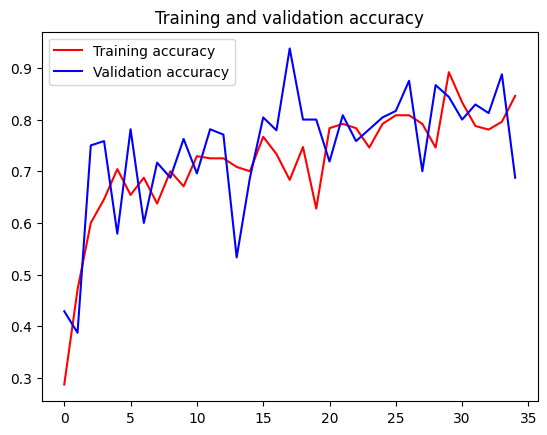

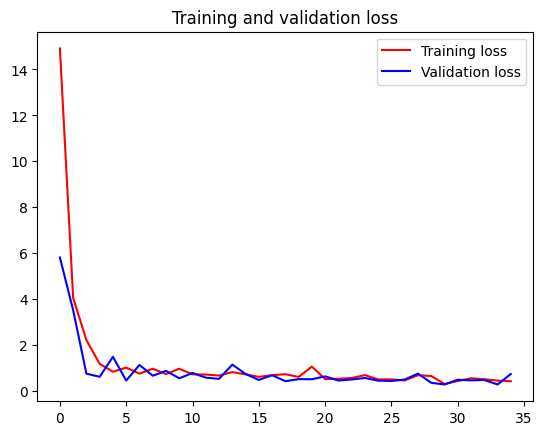

In [85]:
plt.plot(epochs, accuracy, 'r', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.show()

plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()